## BGS clustering catalogues

Instructions for generating clustering and random catalogues for the BGS using the `mkCat_main.py` script, starting from the `full` catalogues produced by Ashley. The following lines should be run in a terminal on NERSC.

First, load the DESI environment.

Create a new directory ```desi``` in your scratch space, and clone the latest version of the LSS repo here. Using a different directory name here is fine, and none of the lines below will be affected

Make a directory to store the clustering and random catalogues, with the right directory structure expected by `mkCat_main.py`

Copy the `full` and `full_HPmapcut` files that are needed, for data and randoms. This just copies one of the 18 random files, but more can be used if needed.

v1.3 seems to be the most up to date version (PIP weights exist for the v1.3 dark time tracers but not BGS yet)

When running `mkCat_main.py`, the number of random files to use is specified by the arguments `minr` and `maxr`. These numbers should be converted from a string to an integer, but there is a bug in the code where it uses the original string values. Run these lines to fix this. If the code get updated, the exact line numbers might change

The redshift limits are set in `mkCat_main.py`. Change these from the default values of 0.01 < z < 0.5 to new values of -0.0033 < z < 1.0. Again, if the code is updated the exact line numbers might change

Finally, run the `mkCat_main.py` script to generate the catalogues. This will generate the file `$OUTPUT_DIR/BGS_BRIGHT_clustering.dat.fits`, with similar random files.

`--clusd y` - set to `y` to make the clustering catalogue 

`--clusran y` - set to `y` to make the random catalogue(s)

`--minr 0` - first random file is set to file number `0`

`--maxr 0` - last random file is set to file number `0`. Increase this if more randoms are used

The files produced contain the fluxes in different bands, but not magnitudes. Sam's k-correction code will need to be run to get the rest-frame colours and absolute magnitudes

### Test plots

Plot the redshift distribution of `BGS_BRIGHT_clustering.dat.fits`

zmin -0.0032218880287873753
zmax 0.9998696089877485


Text(0, 0.5, '$10^{-6} \\times dN/dz$')

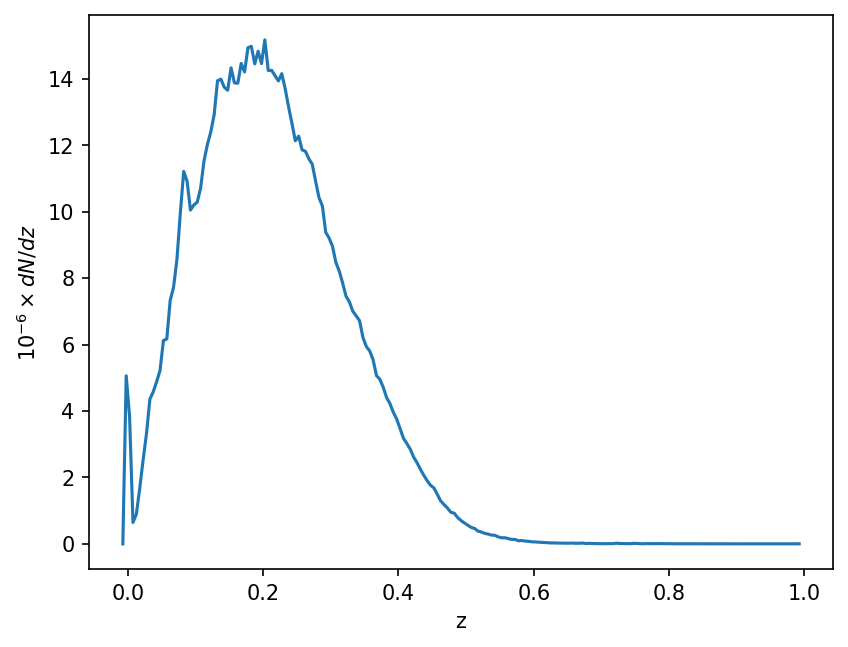

In [2]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt

plt.figure(dpi=150)

data = fitsio.read('/pscratch/sd/a/amjsmith/desihub/test/main/LSS/iron/LSScats/test/BGS_BRIGHT_clustering.dat.fits', columns=['Z'])
z = data['Z']
print('zmin', np.min(z))
print('zmax', np.max(z))

bin_width=0.005
bins = np.arange(-0.01, 1, bin_width)
hist, bins = np.histogram(z, bins=bins)
plt.plot(bins[:-1]+bin_width/2., hist/bin_width/1e6)

plt.xlabel(r"z")
plt.ylabel(r"$10^{-6} \times dN/dz$")